In [1]:
import numpy as np

# Notebook to implement and visualize the ou noise exploration on the offsets


class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu, sigma, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

    def __repr__(self):
        return 'OrnsteinUhlenbeckActionNoise(mu={}, sigma={})'.format(self.mu, self.sigma)

In [5]:
x = np.ones(10)

In [6]:
ou_noise = OrnsteinUhlenbeckActionNoise(
    mu = x, 
    sigma = 0.7)

In [7]:

y = [ou_noise() for i in range(len(x))]



In [12]:
y

[array([ 0.03858897, -0.05734103,  0.14266651,  0.05652079, -0.13097259,
         0.02924103, -0.13365074,  0.01721148, -0.04209447, -0.02421493]),
 array([-0.00397647, -0.01910484,  0.02253747,  0.06297303, -0.12443137,
         0.03367218, -0.15051216,  0.00630427, -0.08149086, -0.01281424]),
 array([ 0.00738655,  0.02717493, -0.03632119, -0.08218266,  0.02583862,
        -0.00515396, -0.31680361,  0.12904793, -0.10785093, -0.09281788]),
 array([ 0.00445709,  0.02714613, -0.10004085, -0.1124891 , -0.03046622,
         0.01393889, -0.33640787,  0.06339857, -0.10881862, -0.0135773 ]),
 array([-0.00750866, -0.00993514, -0.1676842 , -0.17349746, -0.02822457,
         0.09000057, -0.37951912,  0.02686582, -0.18549254,  0.07642271]),
 array([-0.00599026, -0.05521131, -0.25881544, -0.16168287,  0.06666634,
         0.09832573, -0.46545092,  0.09451036, -0.36952612,  0.02155265]),
 array([-0.02561836, -0.0204475 , -0.1819725 , -0.2273113 ,  0.09853362,
         0.10482587, -0.50705947, -0.03

In [8]:
import matplotlib.pyplot as plt 

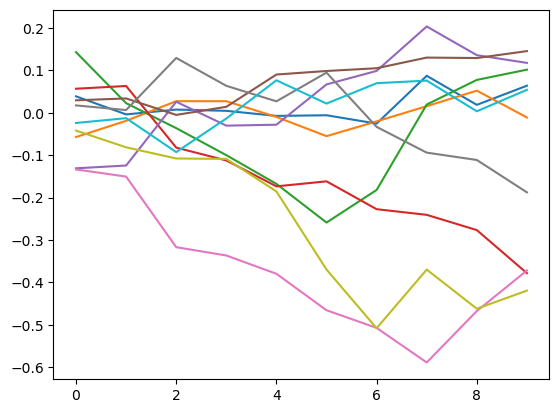

In [16]:
plt.plot(range(len(x)), y)